In [ ]:
import pandas as pd
import time 
import fastavro
import os
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np


<h3>Load CSV Files<h3>


In [30]:
def load_csv (file_path):
    start_time = time.time()
    df = pd.read_csv(file_path)
    load_time = time.time() - start_time
    return df , load_time 

<h3>Load Parquet files<h3>


In [31]:
def load_Parquet (file_path):
    start_time = time.time()
    df = pd.read_parquet(file_path)
    load_time = time.time() - start_time
    return df , load_time 

<h3>Load Avro files<h3>


In [32]:
def load_avro(file_path):
    start_time = time.time()
    with open(file_path, 'rb') as f:  #binary
        df = pd.DataFrame.from_records(fastavro.reader(f))
    load_time = time.time() - start_time
    return df, load_time

In [ ]:
def load_all_formats(base_path, format):
    
    files = ["clubs_dim", "merge-Transfer_Fact", "players_dim", "time_dim", "competitions_dim"]

    data = {}
    load_times = {}

    for file in files:
        file_path = os.path.join(base_path, f"{file}.{format}")

        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            continue

        load_time = None

        if format == 'csv':
            df, load_time = load_csv(file_path)  
        elif format == 'avro':
            df, load_time = load_avro(file_path)  
        elif format == 'parquet':
            df, load_time = load_Parquet(file_path)   
        else:
            raise ValueError("Unsupported format: Please choose 'csv', 'avro', or 'parquet'.")

        data[file] = df
        load_times[file] = load_time

        print(f"Successfully loaded {file_path} in {load_time:.4f} seconds.")

    return data, load_times


In [34]:
 
base_path = 'D:\\DE journey\\DM projects\\Transfer\\all_files'

 
data_csv, load_times_csv = load_all_formats(base_path, format='csv')
 
data_avro, load_times_avro = load_all_formats(base_path, format='avro')
 
data_parquet, load_times_parquet = load_all_formats(base_path, format='parquet')


Successfully loaded D:\DE journey\DM projects\Transfer\all_files\clubs_dim.csv in 0.0120 seconds.
Successfully loaded D:\DE journey\DM projects\Transfer\all_files\merge-Transfer_Fact.csv in 0.1900 seconds.


C:\Users\Salma\AppData\Local\Temp\ipykernel_7544\970382744.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Successfully loaded D:\DE journey\DM projects\Transfer\all_files\players_dim.csv in 0.1310 seconds.
Successfully loaded D:\DE journey\DM projects\Transfer\all_files\time_dim.csv in 0.0060 seconds.
Successfully loaded D:\DE journey\DM projects\Transfer\all_files\competitions_dim.csv in 0.0010 seconds.
Successfully loaded D:\DE journey\DM projects\Transfer\all_files\clubs_dim.avro in 0.0070 seconds.
Successfully loaded D:\DE journey\DM projects\Transfer\all_files\merge-Transfer_Fact.avro in 2.2600 seconds.
Successfully loaded D:\DE journey\DM projects\Transfer\all_files\players_dim.avro in 0.7030 seconds.
Successfully loaded D:\DE journey\DM projects\Transfer\all_files\time_dim.avro in 0.0220 seconds.
Successfully loaded D:\DE journey\DM projects\Transfer\all_files\competitions_dim.avro in 0.0010 seconds.
Successfully loaded D:\DE journey\DM projects\Transfer\all_files\clubs_dim.parquet in 0.0050 seconds.
Successfully loaded D:\DE journey\DM projects\Transfer\all_files\merge-Transfer_Fac

<h2>Display Load Times<h2>


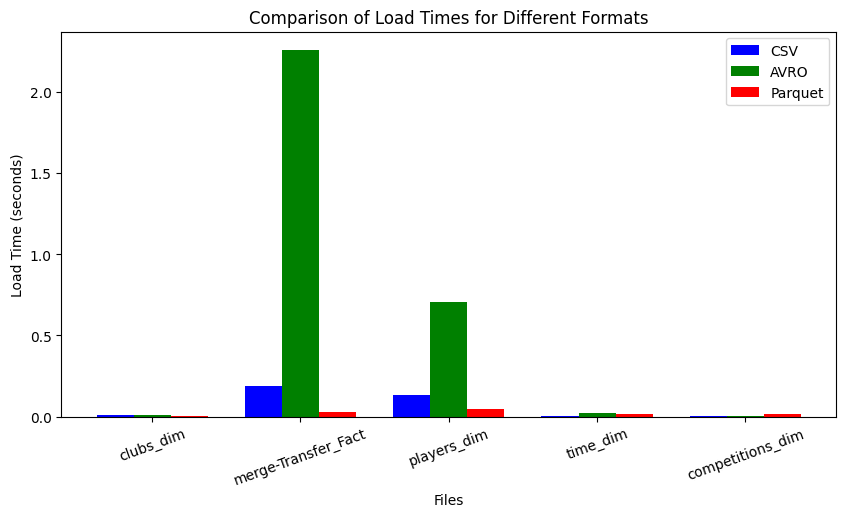

In [ ]:
files = ["clubs_dim", "merge-Transfer_Fact", "players_dim", "time_dim", "competitions_dim"]

csv_times = [load_times_csv.get(f, 0) for f in files]
avro_times = [load_times_avro.get(f, 0) for f in files]
parquet_times = [load_times_parquet.get(f, 0) for f in files]

x = np.arange(len(files))  
width = 0.25  

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width, csv_times, width, label='CSV', color='blue')
ax.bar(x, avro_times, width, label='AVRO', color='green')
ax.bar(x + width, parquet_times, width, label='Parquet', color='red')

ax.set_xlabel("Files")
ax.set_ylabel("Load Time (seconds)")
ax.set_title("Comparison of Load Times for Different Formats")
ax.set_xticks(x)
ax.set_xticklabels(files, rotation=20)
ax.legend()

plt.show()


<h3>Get Top Goal Scorers<h3>

In [36]:
def query_top_goal_scorers(players_df):
    last_season = players_df['last_season'].max()
    top_goal_scorers = players_df[players_df['last_season'] == last_season].nlargest(10, 'goals')
    return top_goal_scorers[['name', 'goals', 'last_season']]

<H3>Get Top Transfers by Fee<H3>

In [38]:
def query_top_transfers_by_fee(transfer_df):
    top_transfers = transfer_df.nlargest(10, 'total_transfer_fee')
    return top_transfers[['player_id', 'from_club_id', 'to_club_id', 'total_transfer_fee']]

In [48]:
def display_results(format, top_goal_scorers, top_transfers):
    print(f"Results for {format} format:")
    print("\nTop 10 Goal Scorers:")
    print(tabulate(top_goal_scorers, headers="keys", tablefmt="pretty"))
    
    
    print("\nTop 10 Transfers by Fee:")
    print(tabulate(top_transfers, headers="keys", tablefmt="pretty"))
    print("\n" + "="*50 + "\n")

In [49]:
for format, data in zip(['CSV', 'AVRO', 'Parquet'], [data_csv, data_avro, data_parquet]):
    players_df = data['players_dim']
    top_goal_scorers = query_top_goal_scorers(players_df)
    display_results(format + ' - Top Goal Scorers', top_goal_scorers, None)

Results for CSV - Top Goal Scorers format:

Top 10 Goal Scorers:
+-------+---------------------+-------+-------------+
|       |        name         | goals | last_season |
+-------+---------------------+-------+-------------+
| 3142  | Robert Lewandowski  |  495  |    2024     |
| 8864  |     Harry Kane      |  334  |    2024     |
| 9423  |    Mohamed Salah    |  282  |    2024     |
| 7644  |    Ciro Immobile    |  266  |    2024     |
| 7268  |    Romelu Lukaku    |  264  |    2024     |
| 16300 |    Kylian Mbappé    |  259  |    2024     |
| 8470  |  Antoine Griezmann  |  234  |    2024     |
| 7101  | Alexandre Lacazette |  228  |    2024     |
| 2293  |     Edin Dzeko      |  227  |    2024     |
| 5720  |    Mauro Icardi     |  223  |    2024     |
+-------+---------------------+-------+-------------+

Top 10 Transfers by Fee:



Results for AVRO - Top Goal Scorers format:

Top 10 Goal Scorers:
+-------+---------------------+-------+-------------+
|       |        name         

In [51]:
for format, data in zip(['CSV', 'AVRO', 'Parquet'], [data_csv, data_avro, data_parquet]):
    transfer_df = data['merge-Transfer_Fact']
    top_transfers = query_top_transfers_by_fee(transfer_df)
    display_results(format + ' - Top Transfers by Fee', None, top_transfers)

Results for CSV - Top Transfers by Fee format:

Top 10 Goal Scorers:


Top 10 Transfers by Fee:
+--------+-----------+--------------+------------+--------------------+
|        | player_id | from_club_id | to_club_id | total_transfer_fee |
+--------+-----------+--------------+------------+--------------------+
| 88729  | 125781.0  |     13.0     |   131.0    |    1680000000.0    |
| 83654  |  80444.0  |     31.0     |   131.0    |    1620000000.0    |
|  2718  |  96341.0  |     46.0     |   631.0    |    1582000000.0    |
| 90088  | 132098.0  |    148.0     |    27.0    |    1330000000.0    |
| 134497 | 122153.0  |    506.0     |   985.0    |    1260000000.0    |
| 122297 |  96341.0  |     29.0     |   985.0    |    1185800000.0    |
| 86237  | 139208.0  |    180.0     |    31.0    |    1185100000.0    |
| 93472  |  88755.0  |     82.0     |   281.0    |    1064000000.0    |
| 134224 |  45320.0  |    418.0     |   985.0    |    1050000000.0    |
| 127958 | 177907.0  |    1003.0    |   

In [52]:
def measure_query_time(query_func, *args):
    start_time = time.time()
    result = query_func(*args)
    query_time = time.time() - start_time
    return result, query_time

def display_query_results(format, query_name, result, query_time):
    print(f"Results for {format} format - {query_name} (Time: {query_time:.4f} seconds):")
    if result is not None:
        print(tabulate(result, headers="keys", tablefmt="pretty"))
    print("\n" + "="*50 + "\n")
 
for format, data in zip(['CSV', 'AVRO', 'Parquet'], [data_csv, data_avro, data_parquet]):
    players_df = data['players_dim']
    clubs_df = data['clubs_dim']
    transfer_df = data['merge-Transfer_Fact']
    
# Time measurement for scorers query
    top_goal_scorers, goal_scorers_time = measure_query_time(query_top_goal_scorers, players_df)
    display_query_results(format, "Top Goal Scorers", top_goal_scorers, goal_scorers_time)
    
 # Measure time to query highest conversions
    top_transfers, transfers_time = measure_query_time(query_top_transfers_by_fee, transfer_df)
    display_query_results(format, "Top Transfers by Fee", top_transfers, transfers_time)

Results for CSV format - Top Goal Scorers (Time: 0.0080 seconds):
+-------+---------------------+-------+-------------+
|       |        name         | goals | last_season |
+-------+---------------------+-------+-------------+
| 3142  | Robert Lewandowski  |  495  |    2024     |
| 8864  |     Harry Kane      |  334  |    2024     |
| 9423  |    Mohamed Salah    |  282  |    2024     |
| 7644  |    Ciro Immobile    |  266  |    2024     |
| 7268  |    Romelu Lukaku    |  264  |    2024     |
| 16300 |    Kylian Mbappé    |  259  |    2024     |
| 8470  |  Antoine Griezmann  |  234  |    2024     |
| 7101  | Alexandre Lacazette |  228  |    2024     |
| 2293  |     Edin Dzeko      |  227  |    2024     |
| 5720  |    Mauro Icardi     |  223  |    2024     |
+-------+---------------------+-------+-------------+


Results for CSV format - Top Transfers by Fee (Time: 0.0180 seconds):
+--------+-----------+--------------+------------+--------------------+
|        | player_id | from_club_i

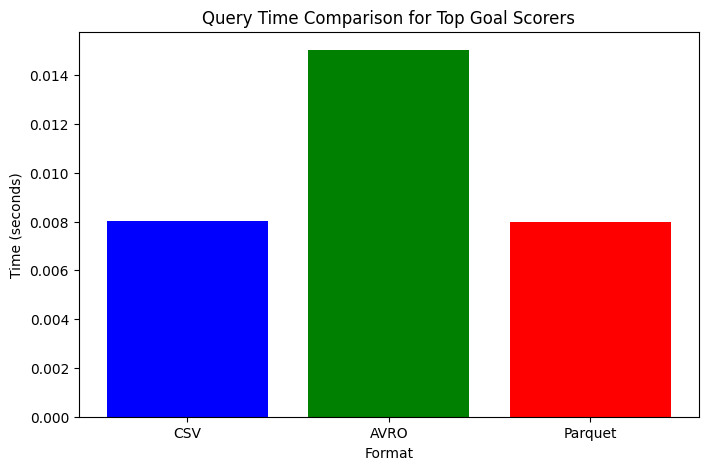

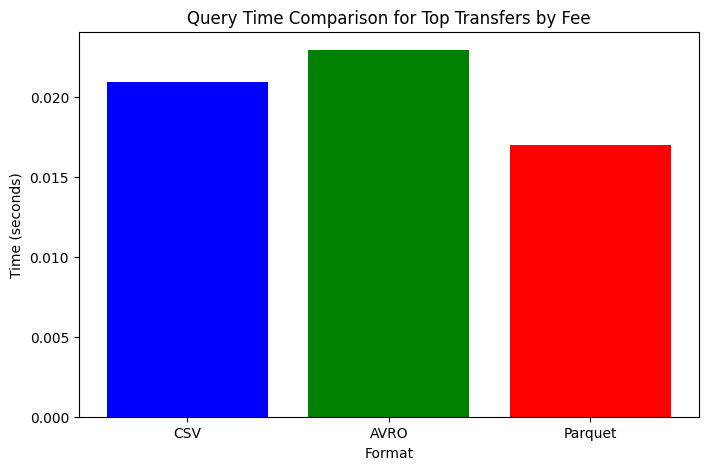

In [53]:
def plot_query_times(query_name, csv_time, avro_time, parquet_time):
    formats = ['CSV', 'AVRO', 'Parquet']
    times = [csv_time, avro_time, parquet_time]
    
    plt.figure(figsize=(8, 5))
    plt.bar(formats, times, color=['blue', 'green', 'red'])
    plt.title(f'Query Time Comparison for {query_name}')
    plt.xlabel('Format')
    plt.ylabel('Time (seconds)')
    plt.show()

 
query_times = {
    "Top Goal Scorers": {"CSV": 0, "AVRO": 0, "Parquet": 0},
 
    "Top Transfers by Fee": {"CSV": 0, "AVRO": 0, "Parquet": 0}
}

 
for format, data in zip(['CSV', 'AVRO', 'Parquet'], [data_csv, data_avro, data_parquet]):
    players_df = data['players_dim']
    clubs_df = data['clubs_dim']
    transfer_df = data['merge-Transfer_Fact']
    
 
    top_goal_scorers, goal_scorers_time = measure_query_time(query_top_goal_scorers, players_df)
    query_times["Top Goal Scorers"][format] = goal_scorers_time
    
 
    
 
    top_transfers, transfers_time = measure_query_time(query_top_transfers_by_fee, transfer_df)
    query_times["Top Transfers by Fee"][format] = transfers_time

 
for query_name, times in query_times.items():
    plot_query_times(query_name, times['CSV'], times['AVRO'], times['Parquet'])